In [1]:
import os
from pathlib import Path

# 取得當前工作目錄
current = Path(os.getcwd())

# 檢查當前目錄的父目錄名稱並執行相應操作
if current.name == 'Notebooks':
    print(f"Current Path: {current}")
elif current.name == 'test_notebooks':
    # 切換到上層目錄
    os.chdir('../')
    # 更新 current 變量為新的工作目錄
    current = Path(os.getcwd())
    print(f"Updated Path: {current}")
else:
    print("No matching parent directory found.")

Updated Path: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [2]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

from mymodules.filter.basic_filters import get_lines_hough, equalized_image, image_binary, crop

In [3]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['1_1.tif',
 '1_2.tif',
 '2_1.tif',
 '2_2.tif',
 '3_1.tif',
 '3_2.tif',
 '4_1.tif',
 '4_2.tif',
 '5_1.tif',
 '5_2.tif',
 '6_1.tif',
 '6_2.tif']

Image changed to Blue channel
Name: 5_2.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO
Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048)
Max:  166
Min:  0
Mean:  0.5761640625
Standard Deviation:  5.107244090470523


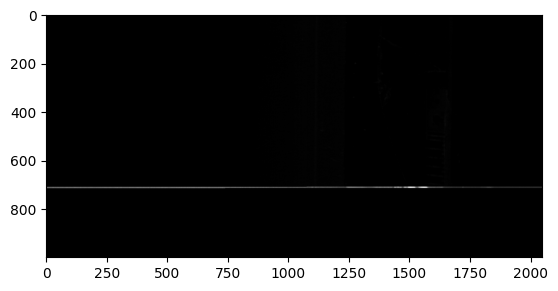

In [4]:
image_number = 9
# image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.basic_array_info()
origin_im.show()

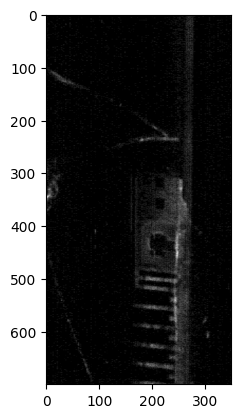

In [5]:
origin_im = origin_im.process(crop, params={'x1':1400,'x2': 1750, 'y1':0, 'y2':700}) # 9
origin_im.show()

In [6]:
import cv2
import numpy as np

def dilate(image: np.ndarray, kernel: np.ndarray = None, iterations: int = 1) -> np.ndarray:
    """膨脹操作 (Dilation)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.dilate(image, kernel, iterations=iterations)

def erode(image: np.ndarray, kernel: np.ndarray = None, iterations: int = 1) -> np.ndarray:
    """侵蝕操作 (Erosion)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.erode(image, kernel, iterations=iterations)

def close(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """閉運算 (Closing)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

def open(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """開運算 (Opening)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

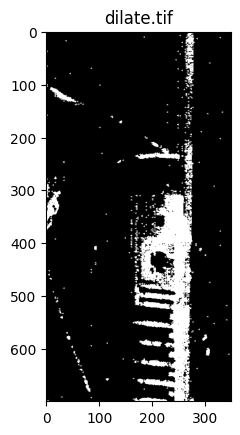

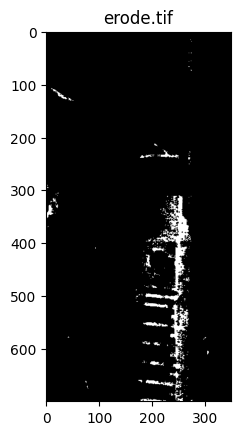

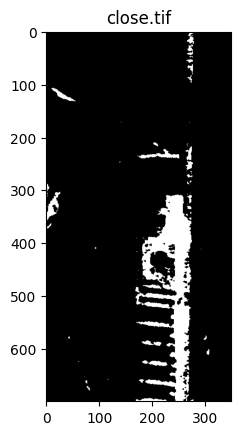

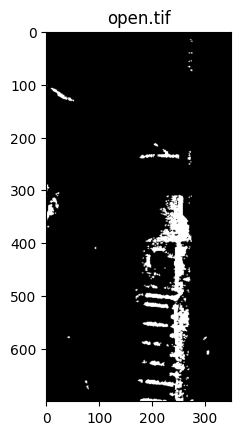

In [7]:
aim_im = origin_im.process(image_binary)

kernel = np.array([
    [1, 0, 0],
    [1, 1, 1],
    [1, 0, 0]
], dtype=np.uint8)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(dilate, params={'kernel': kernel, 'iterations': 1})
process_im.show(title=True)
process_im = aim_im.process(erode, params={'kernel': kernel, 'iterations': 1})
process_im.show(title=True)
process_im = aim_im.process(close, params={'kernel': kernel})
process_im = process_im.process(close, params={'kernel': kernel})
process_im.show(title=True)
process_im = aim_im.process(open, params={'kernel': kernel})
process_im.show(title=True)


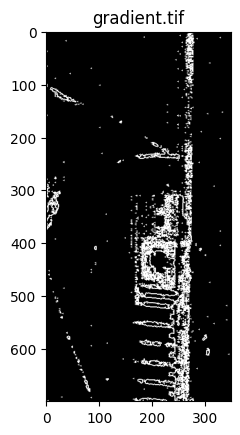

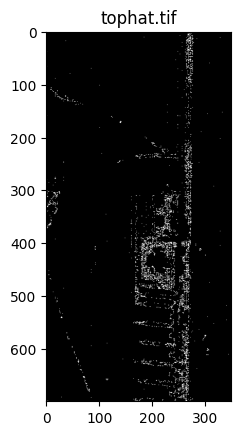

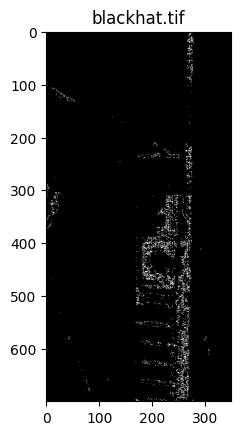

In [8]:
def gradient(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """形態學梯度 (Morphological Gradient)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

def tophat(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """頂帽運算 (Top-Hat)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

def blackhat(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """黑帽運算 (Black-Hat)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

aim_im = origin_im.process(image_binary)

kernel = np.array([
    [1, 0, 0],
    [1, 1, 1],
    [1, 0, 0]
], dtype=np.uint8)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(gradient, params={'kernel': kernel})
process_im.show(title=True)
process_im = aim_im.process(tophat, params={'kernel': kernel})
process_im.show(title=True)
process_im = aim_im.process(blackhat, params={'kernel': kernel})
process_im.show(title=True)


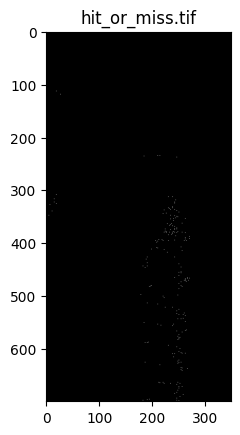

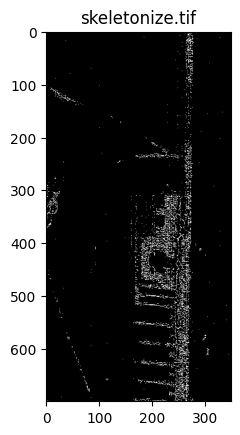

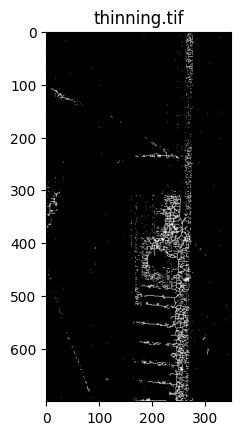

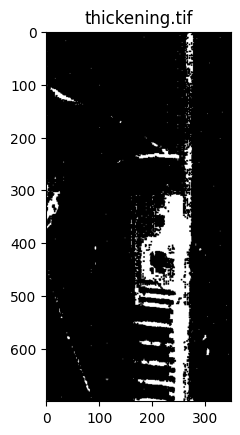

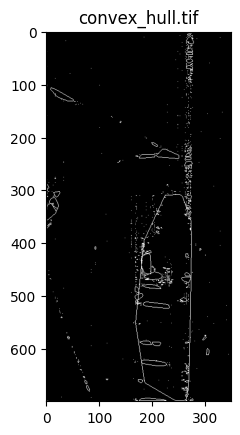

In [9]:
def hit_or_miss(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """擊中或擊不中操作 (Hit-or-Miss)"""
    if kernel is None:
        kernel = np.array([[0, 1, 0], [1, -1, 1], [0, 1, 0]], np.int8)  # 自定內核
    processed_image = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)
    return processed_image

def skeletonize(image: np.ndarray) -> np.ndarray:
    """骨架化操作 (Skeletonization)"""
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    while True:
        eroded = cv2.erode(image, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(image, temp)
        skel = cv2.bitwise_or(skel, temp)
        image = eroded.copy()
        if cv2.countNonZero(image) == 0:
            break
    return skel

def thinning(image: np.ndarray) -> np.ndarray:
    """細化操作 (Thinning)"""
    return cv2.ximgproc.thinning(image)  # 使用 OpenCV 額外模組進行細化

def thickening(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """加粗操作 (Thickening)"""
    if kernel is None:
        kernel = np.ones((3, 3), np.uint8)
    thick = cv2.morphologyEx(cv2.bitwise_not(image), cv2.MORPH_OPEN, kernel)
    processed_image = cv2.bitwise_not(thick)
    return processed_image

def convex_hull(image: np.ndarray) -> np.ndarray:
    """凸包操作 (Convex Hull)"""
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    hull = [cv2.convexHull(c) for c in contours]
    hull_image = np.zeros(image.shape, np.uint8)
    cv2.drawContours(hull_image, hull, -1, (255, 255, 255), 1)
    return hull_image

aim_im = origin_im.process(image_binary)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(hit_or_miss)
process_im.show(title=True)
process_im = aim_im.process(skeletonize)
process_im.show(title=True)
process_im = aim_im.process(thinning)
process_im.show(title=True)
process_im = aim_im.process(thickening)
process_im.show(title=True)
process_im = aim_im.process(convex_hull)
process_im.show(title=True)

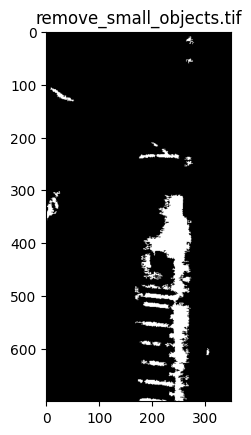

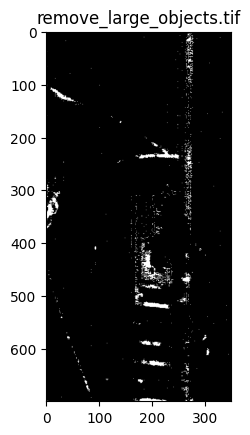

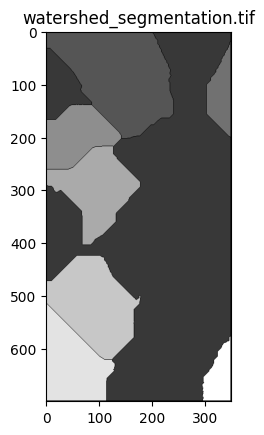

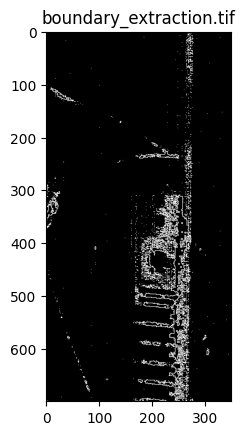

In [26]:
def remove_small_objects(image: np.ndarray, min_size: int) -> np.ndarray:
    """移除小物件 (Remove Small Objects)"""
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(image.shape, np.uint8)
    for contour in contours:
        if cv2.contourArea(contour) >= min_size:
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    return mask

def remove_large_objects(image: np.ndarray, max_size: int) -> np.ndarray:
    """移除大物件 (Remove Large Objects)"""
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(image.shape, np.uint8)
    for contour in contours:
        if cv2.contourArea(contour) <= max_size:
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    return mask

def watershed_segmentation(image: np.ndarray) -> np.ndarray:
    """分水嶺分割 (Watershed Segmentation)"""
    ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    processed_image = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)
    return processed_image

def boundary_extraction(image: np.ndarray) -> np.ndarray:
    """邊界提取 (Boundary Extraction)"""
    eroded_image = cv2.erode(image, np.ones((3, 3), np.uint8))
    processed_image = cv2.subtract(image, eroded_image)
    return processed_image



aim_im = origin_im.process(image_binary)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(remove_small_objects, params={'min_size':20})
process_im.show(title=True)
process_im = aim_im.process(remove_large_objects, params={'max_size':300})
process_im.show(title=True)
process_im = aim_im.process(watershed_segmentation)
process_im.show(title=True)
process_im = aim_im.process(boundary_extraction)
process_im.show(title=True)

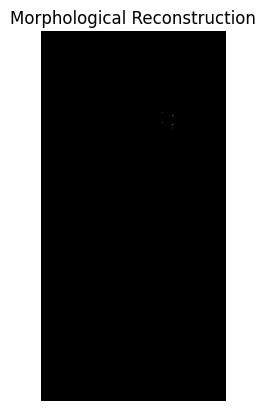

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def morphological_reconstruction(marker: np.ndarray, mask: np.ndarray) -> np.ndarray:
    """形態學重建 (Morphological Reconstruction)"""
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    prev_marker = marker.copy()
    while True:
        dilation = cv2.dilate(prev_marker, se)
        next_marker = np.minimum(dilation, mask)
        if np.array_equal(next_marker, prev_marker):
            break
        prev_marker = next_marker.copy()
    return next_marker

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
aim_im = origin_im.process(image_binary)

# 定義 marker 和 mask，這裡使用簡單的二值化結果作為示例
mask = aim_im.image  # 使用二值化後的圖像作為 mask
marker = np.zeros_like(mask)  # 初始化 marker 為全零圖像
marker[150:200, 200:250] = 255  # 在 marker 中設置一個小區域為 255

# 執行形態學重建並顯示結果
reconstructed_image = morphological_reconstruction(marker=marker, mask=mask)

plt.imshow(reconstructed_image, cmap='gray')
plt.title('Morphological Reconstruction')
plt.axis('off')
plt.show()

In [ ]:
def geodesic_dilation(marker: np.ndarray, mask: np.ndarray) -> np.ndarray:
    """測地膨脹 (Geodesic Dilation)"""
    se = np.ones((3, 3), np.uint8)
    prev_marker = marker.copy()
    while True:
        dilation = cv2.dilate(prev_marker, se)
        prev_marker = np.minimum(dilation, mask)
        if np.array_equal(prev_marker, marker):
            break
        marker = prev_marker.copy()
    return marker

def geodesic_erosion(marker: np.ndarray, mask: np.ndarray) -> np.ndarray:
    """測地侵蝕 (Geodesic Erosion)"""
    se = np.ones((3, 3), np.uint8)
    prev_marker = marker.copy()
    while True:
        erosion = cv2.erode(prev_marker, se)
        prev_marker = np.maximum(erosion, mask)
        if np.array_equal(prev_marker, marker):
            break
        marker = prev_marker.copy()
    return marker

def morphological_gradient_reconstruction(image: np.ndarray) -> np.ndarray:
    """形態學梯度重建 (Morphological Gradient Reconstruction)"""
    dilated = cv2.dilate(image, np.ones((3, 3), np.uint8))
    eroded = cv2.erode(image, np.ones((3, 3), np.uint8))
    gradient = cv2.subtract(dilated, eroded)
    reconstructed_image = morphological_reconstruction(gradient, image)
    return reconstructed_image

def granulometry(image: np.ndarray, max_size: int) -> np.ndarray:
    """顆粒測量 (Granulometry)"""
    granulometry_curve = []
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    for size in range(1, max_size+1):
        opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, se)
        granulometry_curve.append(cv2.countNonZero(opened))
    return np.array(granulometry_curve)

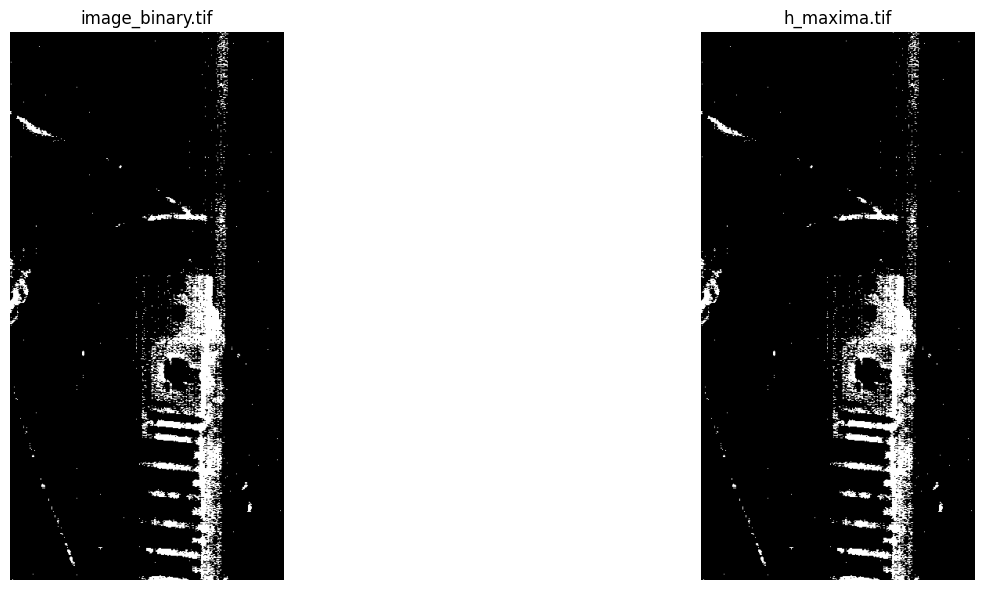

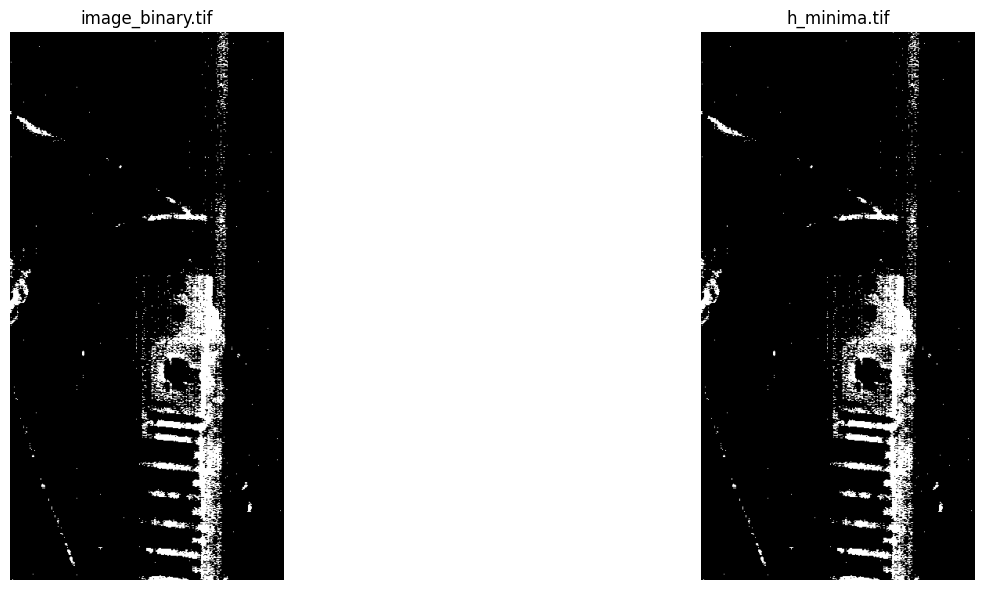

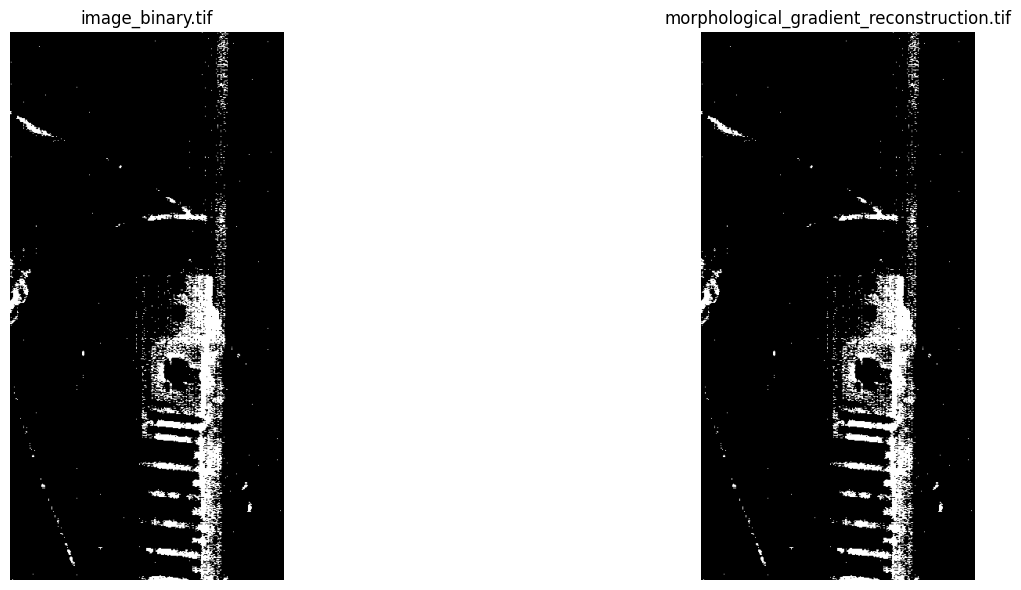

In [21]:
def h_maxima(image: np.ndarray, h: int) -> np.ndarray:
    """H-Maxima 操作"""
    marker = image - h
    processed_image = morphological_reconstruction(marker, image)
    return processed_image

def h_minima(image: np.ndarray, h: int) -> np.ndarray:
    """H-Minima 操作"""
    marker = image + h
    processed_image = morphological_reconstruction(marker, image)
    return processed_image

def morphological_gradient_reconstruction(image: np.ndarray) -> np.ndarray:
    """形態學梯度重建 (Morphological Gradient Reconstruction)"""
    dilated = cv2.dilate(image, np.ones((3, 3), np.uint8))
    eroded = cv2.erode(image, np.ones((3, 3), np.uint8))
    gradient = cv2.subtract(dilated, eroded)
    reconstructed_image = morphological_reconstruction(gradient, image)
    return reconstructed_image

aim_im = origin_im.process(image_binary)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(h_maxima, params={'h':10}, compare=True)
process_im = aim_im.process(h_minima, params={'h':10}, compare=True)
process_im = aim_im.process(morphological_gradient_reconstruction, compare=True)


In [ ]:

def area_opening(image: np.ndarray, area_threshold: int) -> np.ndarray:
    """面積開運算 (Area Opening)"""
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(image.shape, np.uint8)
    for contour in contours:
        if cv2.contourArea(contour) > area_threshold:
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    return mask

def area_closing(image: np.ndarray, area_threshold: int) -> np.ndarray:
    """面積閉運算 (Area Closing)"""
    inverted_image = cv2.bitwise_not(image)
    processed_image = area_opening(inverted_image, area_threshold)
    return cv2.bitwise_not(processed_image)

def thinning_by_iteration(image: np.ndarray, max_iterations: int = -1) -> np.ndarray:
    """基於迭代的細化操作 (Thinning by Iteration)"""
    prev_image = image.copy()
    for _ in range(max_iterations if max_iterations > 0 else np.inf):
        thinned_image = cv2.ximgproc.thinning(prev_image)
        if np.array_equal(thinned_image, prev_image):
            break
        prev_image = thinned_image.copy()
    return thinned_image

def prune(image: np.ndarray, iterations: int = 1) -> np.ndarray:
    """剪枝操作 (Pruning)"""
    pruned_image = image.copy()
    for _ in range(iterations):
        skeleton = cv2.ximgproc.thinning(pruned_image)
        temp = cv2.subtract(pruned_image, skeleton)
        pruned_image = cv2.subtract(pruned_image, temp)
    return pruned_image